# Frequencies of words in novels: a Data Science pipeline

<p align="center">
<img src="img/live_preview.jpeg" width="550">
</p>

Earlier this week, I did a Facebook Live Code along session. In it, we used some basic Natural Language Processing to plot the most frequently occurring words in the novel _Moby Dick_. In doing so, we also see the efficacy of thinking in terms of the following Data Science pipeline with a constant regard for process:
1. State your question;
2. Get your data;
3. Wrangle your data to answer your question;
4. Answer your question;
5. Present your solution so that others can understand it.

In this live post, you'll learn how to build a data science pipeline to plot frequency distributions of words in *Moby Dick*, among many other novels.

We won't give you the novels: you'll learn to scrape them from the website [Project Gutenberg](https://www.gutenberg.org/) (which basically contains a large corpus of books) using the Python package `requests` and how to extract the novels from this web data using `BeautifulSoup`. Then you'll dive in to analyzing the novels using the Natural Language ToolKit (`nltk`). In the process, you'll learn about important aspects of Natural Language Processing (NLP) such as tokenization and stopwords.

You'll come out being able to visualize word frequency distributions of any novel that you can find on Project Gutenberg. The NLP skills you develop, however, will be applicable to much of the data that data scientists encounter as the vast proportion of the world's data is unstructured data and includes a great deal of text.

For example, what would the following word frequency distribution be from?

<img src="img/d-x.png" width="350">

This post was generated from a Jupyter Notebook; You can find it in [this repository](https://github.com/datacamp/datacamp_facebook_live_nlp/). If you have any thoughts, responses and/or ruminations, feel free to reach out to me on twitter: [@hugobowne](https://twitter.com/hugobowne).

## Pre-steps

Follow the instructions in the README.md to get your system set up and ready to go.

## 1. State Your Question

What are the most frequent words in the novel _Moby Dick_ and how often do they occur?

## 2. Get Your Data

Your raw data is the text of Melville's novel _Moby Dick_. How would you go about getting the text of this ~800 word book into Python? 

Well, there are several ways to do this but first realize that the text is freely available online at [Project Gutenberg](https://www.gutenberg.org/). Let's head there, try to find _Moby Dick_ and then store the relevant URL in your Python namespace:

In [1]:
# Store url
url = 'https://www.gutenberg.org/files/2701/2701-h/2701-h.htm'

Now that you have the URL, you need to fetch the HTML of the website. 

**Note** that HTML stands for Hypertext Markup Language and is the standard markup language for the web.


You're going to use [`requests`](http://docs.python-requests.org/en/master/) to do this, one of the [most popular](https://pythontips.com/2013/07/30/20-python-libraries-you-cant-live-without/) and useful Python packages out there.
You can find out more in DataCamp's [Importing Data in Python (Part 2) course](https://www.datacamp.com/courses/importing-data-in-python-part-2). 

<img src="img/requests.png" width="200">

According to the `requests` package website:

> Requests allows you to send organic, grass-fed HTTP/1.1 requests, without the need for manual labor.

and the following organizations claim to use `requests` internally:

> Her Majesty's Government, Amazon, Google, Twilio, NPR, Obama for America,  Twitter, Sony, and Federal U.S. Institutions that prefer to be unnamed.

Moreover,

> Requests is one of the most downloaded Python packages of all time, pulling in over 13,000,000 downloads every month. All the cool kids are doing it!

You'll be making a `GET` request from the website, which means you're _getting_ data from it. This is what you're doing through a browser when visiting a webpage using a browser. There are other types of requests, such as `POST` requests, but we won't concern ourselves with them here.

`requests` make this easy with its `get` function. Make the request here and check the object type returned.

In [2]:
# Import `requests`
import requests

# Make the request and check object type
r = requests.get(url)
type(r)

requests.models.Response

This is a `Response` object. You can see in the [`requests` kickstart guide](http://docs.python-requests.org/en/master/user/quickstart/) that a `Response` object has an attribute `text` that allows you to get the HTML from it! Let's do this and print the HTML to check it out:

In [3]:
# Extract HTML from Response object and print
html = r.text
#print(html)

OK! This HTML is not quite what you want. However, it does _contain_ what you want: the text of _Moby Dick_. What you need to do now is _wrangle_ this HTML to extract the novel. 

## 3. Wrangle the Data to Answer the Question

### Part 1: Get the Text from the HTML


Here you'll use the package [`BeautifulSoup`](https://www.crummy.com/software/BeautifulSoup/). The package website says:

<img src="img/bs4.png" width="550">



This looks promising!

Firstly, a word on the name of the package: Beautiful Soup? In web development, the term "tag soup" refers to structurally or syntactically incorrect HTML code written for a web page. What Beautiful Soup does best is to make tag soup beautiful again and to extract information from it with ease! In fact, the main object created and queried when using this package is called `BeautifulSoup`. After creating the soup, we can use its `.get_text()` method to extract the text.

In [4]:
# Import BeautifulSoup from bs4
from bs4 import BeautifulSoup


# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "html5lib")
type(soup)

bs4.BeautifulSoup

From these soup objects, you can extract all types of interesting information about the website you're scraping, such as title:

In [5]:
# Get soup title
soup.title

<title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>

Or the title as a string:

In [6]:
# Get soup title as string
soup.title.string

'\n      Moby Dick; Or the Whale, by Herman Melville\n    '

Or all URLs found within a page’s < a > tags (hyperlinks):

In [7]:
# Get hyperlinks from soup and check out first several
soup.findAll('a')[:8]

[<a href="#link2H_4_0002"> ETYMOLOGY. </a>,
 <a href="#link2H_4_0003"> EXTRACTS (Supplied by a Sub-Sub-Librarian).
         </a>,
 <a href="#link2HCH0001"> CHAPTER 1. Loomings. </a>,
 <a href="#link2HCH0002"> CHAPTER 2. The Carpet-Bag. </a>,
 <a href="#link2HCH0003"> CHAPTER 3. The Spouter-Inn. </a>,
 <a href="#link2HCH0004"> CHAPTER 4. The Counterpane. </a>,
 <a href="#link2HCH0005"> CHAPTER 5. Breakfast. </a>,
 <a href="#link2HCH0006"> CHAPTER 6. The Street. </a>]

What you want to do is to extract the text from the `soup` and there's a super helpful `.get_text()` method precisely for this. 

Get the text, print it out and have a look at it. Is it what you want?

In [8]:
# Get the text out of the soup and print it
text = soup.get_text()
#print(text)

Notice that this is now nearly what you want. 

It is the text of the novel with some unwanted stuff at the start and some unwanted stuff at the end. You could remove it if you wanted. However, this content is so much smaller in amount than the text of Moby Dick that, to a first approximation, it is fine to leave in and this will be the approach here. To get robust results, I'd suggest removing it.

Now that you have the text of interest, it's time for you to count how many times each word appears and to plot the frequency histogram that you want: Natural Language Processing to the rescue!

### Part 2: Extract Words from your Text with NLP

You'll now use `nltk`, the Natural Language Toolkit, to

1. Tokenize the text (fancy term for splitting into tokens, such as words);
2. Remove stopwords (words such as 'a' and 'the' that occur a great deal in ~ nearly all English language texts.


#### Step 1: Tokenize

You want to tokenize your text, that is, split it into a list a words. Essentially, you want to split off the parts off the text that are separated by whitespaces.

To do this, you're going to use a powerful tool called _regular expressions_. A regular expression, or _regex_ for short, is a _sequence of characters_ that define a _search pattern_. They are notoriously confusing and best introduced by example.

* You have the string 'peter piper picked a peck of pickled peppers' and you want to extract from the list of _all_ words in it that start with a 'p'. 

The regular expression that matches all words beginning with 'p' is 'p\w+'. Let's unpack this: 

* the 'p' at the beginning of the regular expression means that you'll only match sequences of characters that start with a 'p';
* the '\w' is a special character that will match any alphanumeric A-z, a-z, 0-9, along with underscores;
* The '+' tells you that the previous character in the regex can appear as many times as you want in strings that you;re trying to match. This means that '\w+' will match arbitrary sequences of alphanumeric characters and underscores.

Put this all together and the regular expression 'p\w+' will match all substrings that start with a 'p' and are followed by alphanumeric characters and underscores. In most English language texts that make sense, this will correspond to words beginning with 'p'.

You'll now use the built-in Python package `re` to extract all words beginning with 'p' from the sentence 'peter piper picked a peck of pickled peppers' as a warm-up.

In [9]:
# Import regex package
import re

# Define sentence
sentence = 'peter piper pick a peck of pickled peppers'

# Define regex
ps = 'p\w+'


# Find all words in sentence that match the regex and print them
re.findall(ps, sentence)

['peter', 'piper', 'pick', 'peck', 'pickled', 'peppers']

This looks pretty good. Now, if 'p\w+' is the regex that matches words beginning with 'p', what's the regex that matches all words?

It's your job to now do this for our toy Peter Piper sentence above.

In [10]:
# Find all words and print them
re.findall('\w+', sentence)

['peter', 'piper', 'pick', 'a', 'peck', 'of', 'pickled', 'peppers']

Now you can do the same with `text`, the string that contains _Moby Dick_:

In [11]:
# Find all words in Moby Dick and print several
tokens = re.findall('\w+', text)
tokens[:8]

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']

**Note** that there is also a way to do this with `nltk`, the [Natural Language Toolkit](http://www.nltk.org/):

In [12]:
# Import RegexpTokenizer from nltk.tokenize
from nltk.tokenize import RegexpTokenizer

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')



# Create tokens
tokens = tokenizer.tokenize(text)
tokens[:8]

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']

OK! You're nearly there. Note, though, that in the above, 'Or' has a capital 'O' and that in other places it may not but both 'Or' and 'or' you will want to count as the same word. For this reason, you will need to build a list of all words in _Moby Dick_ in which all capital letters have been made lower case. You'll find the string method `.lower()` handy:

In [13]:
# Initialize new list
words = []


# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())


# Print several items from list as sanity check
words[:8]

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville']

#### Step 2: Remove stop words

It is common practice to remove words that appear alot in the English language such as 'the', 'of' and 'a' (known as stopwords) because they're not so interesting. For more on all of these techniques, check out our [Natural Language Processing Fundamentals in Python course](https://www.datacamp.com/courses/nlp-fundamentals-in-python). 

The package `nltk` has a list of stopwords in English which you'll now store as `sw` and of which you'll print the first several elements.

If you get an error here, run the command `nltk.download('stopwords')` to install the stopwords on your system.

In [14]:
# Import nltk
import nltk

# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
sw[:5]

['i', 'me', 'my', 'myself', 'we']

You want the list of all words in `words` that are *not* in `sw`. One way to get this list is to loop over all elements of `words` and add the to a new list if they are *not* in `sw`:

In [15]:
# Initialize new list
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Print several list items as sanity check
words_ns[:5]

['moby', 'dick', 'whale', 'herman', 'melville']

## 4. Answer your question



Our question was 'What are the most frequent words in the novel Moby Dick and how often do they occur?' 

You can now plot a frequency histogram of words in Moby Dick in two line of code using `nltk`. To do this,

* You create a frequency distribution object using the function `nltk.FreqDist()`;
* You use the `plot()` method of the resulting object.

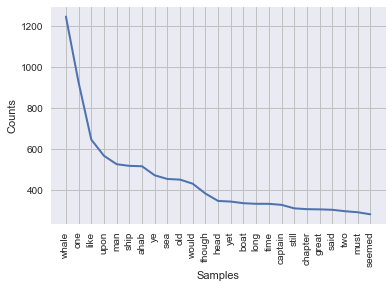

In [16]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

## 5. Present Your Solution

The cool thing is that, in using `nltk` to answer our question, we actually already presented our solution in a manner that can be communicated to other: a frequency distribution plot! You can read off the most common words, along with their frequency. For example, 'whale' is the most common word in the novel (go figure), excepting stopwords, and it occurs a whopping >1200 times! 

___
## BONUS MATERIAL

As you have seen that there are lots of novels on Project Gutenberg, we can make these word frequency histograms of, it makes sense to write your own function that does all of this:

In [17]:
def plot_word_freq(url):
    """Takes a url (from Project Gutenberg) and plots a word frequency
    distribution"""
    # Make the request and check object type
    r = requests.get(url)
    # Extract HTML from Response object and print
    html = r.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    # Get the text out of the soup and print it
    text = soup.get_text()
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Create freq dist and plot
    freqdist1 = nltk.FreqDist(words_ns)
    freqdist1.plot(25)

Now use the function to plot word frequency distributions from other texts on Project Gutenberg:

* Pride and Prejudice:

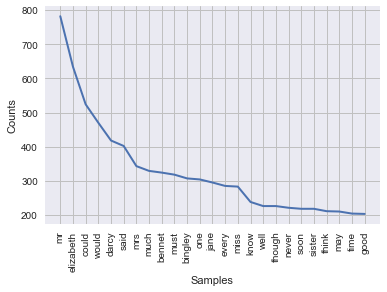

In [18]:
plot_word_freq('https://www.gutenberg.org/files/42671/42671-h/42671-h.htm')

* Robinson Crusoe

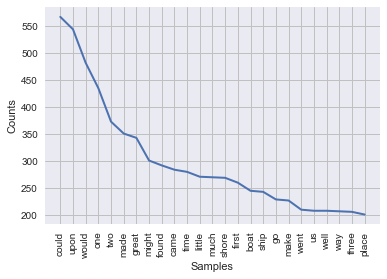

In [19]:
plot_word_freq('https://www.gutenberg.org/files/521/521-h/521-h.htm')

* The King James Bible

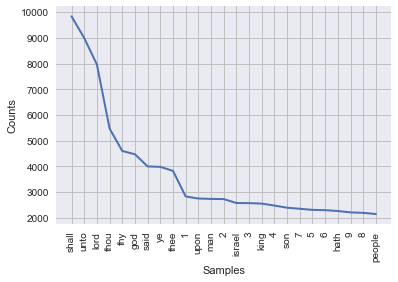

In [20]:
plot_word_freq('https://www.gutenberg.org/files/10/10-h/10-h.htm')

## Conclusion